In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [7]:
X=df.drop(columns=['Survived'])
Y=df['Survived']

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [10]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [18]:
X_train['Age_imputed']=X_train['Age']
X_test['Age_imputed']=X_test['Age']

In [19]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [20]:
# Impute AGE in Train
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = (
    X_train['Age'].dropna()
           .sample(X_train['Age_imputed'].isnull().sum(), replace=True)
           .values
)

# Impute AGE in Test using Train distribution
X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = (
    X_train['Age'].dropna()
           .sample(X_test['Age_imputed'].isnull().sum(), replace=True)
           .values
)


In [22]:
X_train.sample(10)

,Age,Fare,Age_imputed
703,25.0,7.7417,25.0
718,NaN,15.5000,42.0
256,NaN,79.2000,47.0
265,36.0,10.5000,36.0
233,5.0,31.3875,5.0
60,22.0,7.2292,22.0
232,59.0,13.5000,59.0
832,NaN,7.2292,34.0
459,NaN,7.7500,1.0
511,NaN,8.0500,50.0


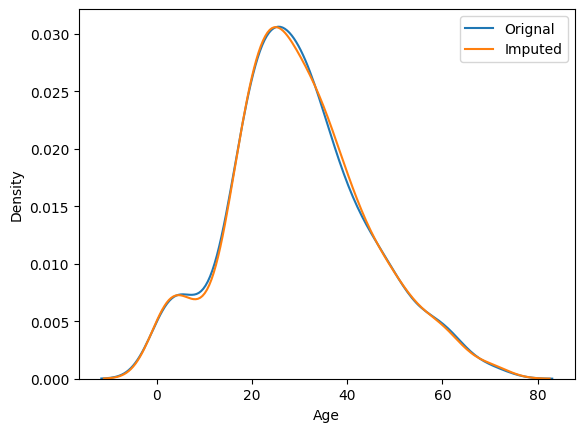

In [26]:
sns.kdeplot(X_train['Age'],label='Orignal')
sns.kdeplot(X_train['Age_imputed'],label='Imputed')
plt.legend()
plt.show()

In [27]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  204.33580109179192


In [28]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,46.796061
Age,71.512440,204.349513,204.349513
Age_imputed,46.796061,204.349513,204.335801


<Axes: >

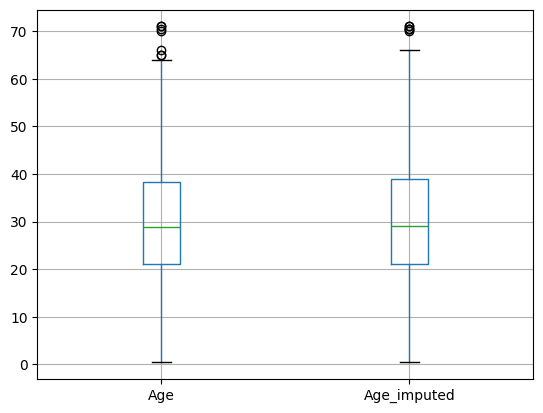

In [30]:
X_train[['Age','Age_imputed']].boxplot()

In [33]:
#for choosing same sample every time to ensure that always answer will be same
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

In [43]:
data=pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [44]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [45]:
data.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [46]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [47]:
data.shape

(1460, 3)

In [48]:
X=data
Y=data['SalePrice']

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [51]:
X_train['GarageQual_imputed']=X_train['GarageQual']
X_test['GarageQual_imputed']=X_test['GarageQual']
X_train['FireplaceQu_imputed']=X_train['FireplaceQu']
X_test['FireplaceQu_imputed']=X_test['FireplaceQu']

In [52]:
X_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd
...,...,...,...,...,...
466,Po,TA,167000,TA,Po
299,Gd,TA,158500,TA,Gd
493,Fa,TA,155000,TA,Fa
527,Gd,TA,446261,TA,Gd


In [53]:
# TRAIN
X_train.loc[X_train['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = (
    X_train['GarageQual'].dropna()
    .sample(X_train['GarageQual_imputed'].isnull().sum(), replace=True)
    .values
)

# TEST (always sample from TRAIN to avoid data leakage)
X_test.loc[X_test['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = (
    X_train['GarageQual'].dropna()
    .sample(X_test['GarageQual_imputed'].isnull().sum(), replace=True)
    .values
)


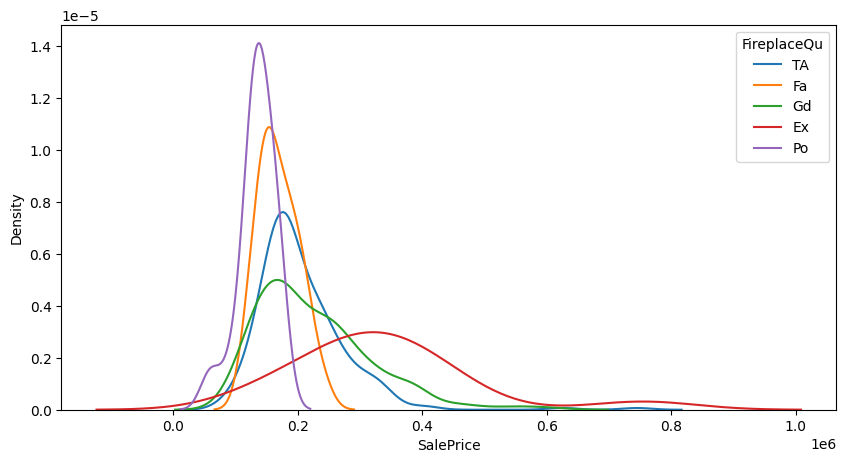

In [58]:
plt.figure(figsize=(10,5))
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],label=category)
plt.legend(title='FireplaceQu')
plt.show()


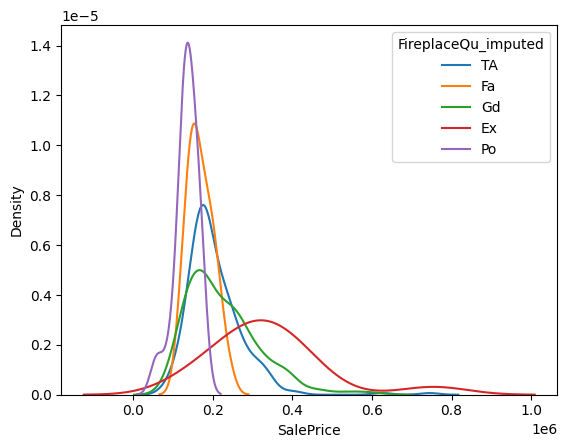

In [61]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)
plt.legend(title='FireplaceQu_imputed')
plt.show()